# **IMPORT LIBRARY**

Pada bagian ini proses penginstallan library demoji dilakukan.

In [64]:
pip install demoji

Semua library yang dibutuhkan selama pelatihan model diimport

In [65]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
import demoji
from sklearn.feature_extraction.text import TfidfVectorizer
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

# **GATHERING/LOAD DATA**

Pada proyek kali ini, digunakan 2 dataset. Dataset pertama diberi nama 'rating', dan dataset kedua diberi nama 'blog'.

In [66]:
rating = pd.read_csv('Blog Ratings.csv')
blog = pd.read_csv('Medium Blog Data.csv')

# **EXPLORATORY DATA ANALYSIS**

### **Univariate Analysis**

In [67]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200140 entries, 0 to 200139
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   blog_id  200140 non-null  int64  
 1   userId   200140 non-null  int64  
 2   ratings  200140 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 4.6 MB


Pada code diatas ditemukan bahwa pada dataset 'rating' memiliki 3 kolom, yaitu 'blog_id', 'userId', dan 'ratings'. Masing-masing kolom tersebut memiliki data sebanyak 200,140 data

In [68]:
print('Jumlah userId : ', rating['userId'].nunique())
print('Jumlah blog_id : ', rating['blog_id'].nunique())
print('Jumlah data rating : ', len(rating))

Jumlah userId :  5001
Jumlah blog_id :  9706
Jumlah data rating :  200140


Dari hasil code diatas terdapat user unik sebanyak 5001 data. Sedangkan blog unik sebanyak 9706. Secara keseluruhan, data pada dataset tersebut dengan total 200,140.

In [69]:
blog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10467 entries, 0 to 10466
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   blog_id       10467 non-null  int64 
 1   author_id     10467 non-null  int64 
 2   blog_title    10467 non-null  object
 3   blog_content  10467 non-null  object
 4   blog_link     10467 non-null  object
 5   blog_img      10467 non-null  object
 6   topic         10467 non-null  object
 7   scrape_time   10467 non-null  object
dtypes: int64(2), object(6)
memory usage: 654.3+ KB


Pada dataset 'blog' terdapat 8 kolom, yaitu 'blog_id', 'autho_id', 'blog_title', 'blog_content', 'blog_link', 'blog_img', 'topic', dan 'scrape_time'. Namun yang akan digunakan pada proses modelling hanya 3 kolom saja, yaitu kolom 'blog_id', 'blog_title', dan 'topic'. Sehingga pada proses ini hanya 3 kolom saja yang di*explore*.

In [70]:
print('Jumlah blog_id : ', blog['blog_id'].nunique())
print('Jumlah topic : ', blog['topic'].nunique())
print('topic Blog: ', blog['topic'].unique())

Jumlah blog_id :  10467
Jumlah topic :  23
topic Blog:  ['ai' 'image-processing' 'Cryptocurrency' 'data-science' 'dev-ops'
 'security' 'android' 'cloud-computing' 'nlp' 'cloud-services' 'flutter'
 'web3' 'cybersecurity' 'information-security' 'blockchain'
 'machine-learning' 'deep-learning' 'data-analysis' 'backend'
 'backend-development' 'app-development' 'web-development'
 'Software-Development']


Hasil code diatas ditemukan bahwa jumlah blog yaitu 10467, topic dengan 23.

### **Visualisasi Data**

Pada bagian ini, akan dilakukan beberapa visualisasi data untuk memahami dataset secara mendalam

In [71]:
topics = blog.groupby('topic')['blog_id'].count().sort_values(ascending=False).head(10)
topics

topic
ai                  736
blockchain          644
cybersecurity       642
web-development     635
data-analysis       594
cloud-computing     589
security            527
web3                471
machine-learning    467
nlp                 453
Name: blog_id, dtype: int64

Code diatas akan menampilkan 10 topik terbanyak yang ada pada blog. Agar lebih mudah membandingkannya, dilakukan visualisasi data

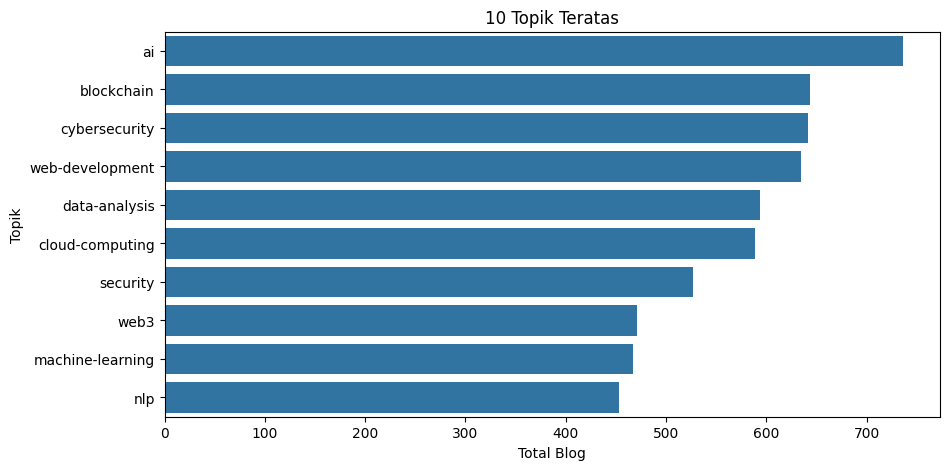

In [72]:
plt.figure(figsize=(10,5))

sns.barplot(y=topics.index, x=topics.values)
plt.title('10 Topik Teratas')
plt.xlabel('Total Blog')
plt.ylabel('Topik')
plt.show()


Menggunkan hasil visualisasi diatas, dapat dipahami lebih mudah bagaimana perbandingan setiap topik pada blog

In [73]:
blog_count_by_user = rating.groupby('userId')['blog_id'].count().sort_values(ascending=False).head(5)
blog_count_by_user

userId
3619    374
3882    299
4453    296
4012    295
4131    287
Name: blog_id, dtype: int64

Code diatas digunakan untuk menampilkan 5 user yang paling sering memberikan rating pada suatu blog. Dapat dilihat yaitu user dengan ID 3619 memberikan rating kepada 374 blog.

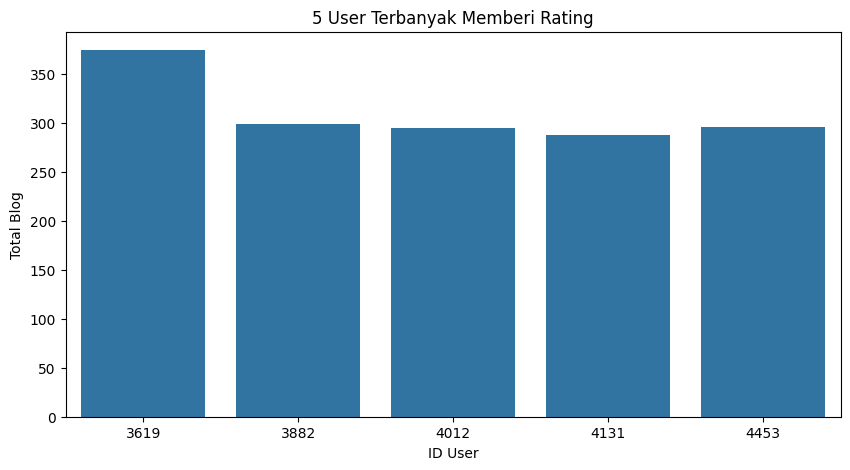

In [74]:
plt.figure(figsize=(10,5))

sns.barplot(x=blog_count_by_user.index, y=blog_count_by_user.values)
plt.title('5 User Terbanyak Memberi Rating')
plt.xlabel('ID User')
plt.ylabel('Total Blog')
plt.show()


Dengan hasil visualisasi tersebut, kita dapat mengetahui bagaimana perbandingan setiap user yang memberikan rating

In [75]:
average_ratings_by_blog = rating.groupby('blog_id')['ratings'].mean().sort_values(ascending=False).head(10)
print(average_ratings_by_blog)

blog_id
1342    5.000000
3246    5.000000
1296    5.000000
4463    5.000000
1246    5.000000
6705    5.000000
4137    4.863636
3936    4.833333
5706    4.833333
7415    4.785714
Name: ratings, dtype: float64


Code diatas digunakan untuk memberikan hasil 10 ID Blog dengan rata-rata tertinggi.

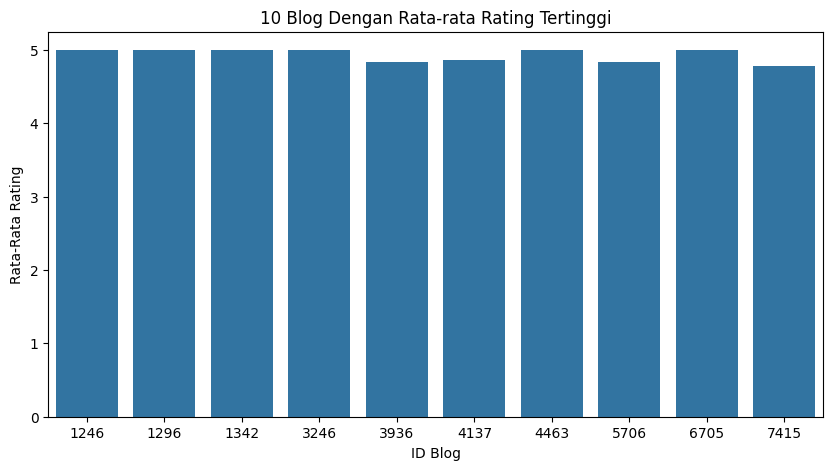

In [76]:
plt.figure(figsize=(10,5))

sns.barplot(x=average_ratings_by_blog.index, y=average_ratings_by_blog.values)
plt.title('10 Blog Dengan Rata-rata Rating Tertinggi')
plt.xlabel('ID Blog')
plt.ylabel('Rata-Rata Rating')
plt.show()

Digunakan visualiasi barplot untuk memahami data agar lebih mudah

# **DATA PREPROCESSING**

Pada proses data preprocessing ini, tidak terlalu banyak yang dilakukan. Proses yang dilakukan hanya penggabungan dataset 'rating' dan 'blog' saja.

In [77]:
all_blog = pd.merge(rating, blog, on='blog_id', how='left')
all_blog.head()

,blog_id,userId,ratings,author_id,blog_title,blog_content,blog_link,blog_img,topic,scrape_time
0,9025,11,3.5,5960,How I became a Frontend Developer,A little bit of background about me: as a teen...,https://medium.com/@steven.dornan93/how-i-beca...,https://miro.medium.com/v2/resize:fill:140:140...,web-development,2023-04-04 08:53:52
1,9320,11,5.0,6155,Writing an Algorithm to Calculate Article Read...,You have probably noticed a read-time number u...,https://medium.com/@dpericich/writing-an-algor...,https://miro.medium.com/v2/resize:fill:140:140...,web-development,2023-04-04 08:53:52
2,9246,11,3.5,6114,Diving into HTML and the Tools of the Trade,It’s been an incredible first week as a Bytewi...,https://medium.com/@muhammadnaeemtahir/diving-...,https://miro.medium.com/v2/resize:fill:140:140...,web-development,2023-04-04 08:53:52
3,9431,11,5.0,2386,Learning Too Many Programming Languages at Once?,Learning too many programming languages at onc...,https://medium.com/@mohit-singh/learning-too-m...,https://miro.medium.com/v2/resize:fill:140:140...,web-development,2023-04-04 08:53:52
4,875,11,2.0,699,Cryptocurrency Regulations: A Tug of War Betwe...,"Once upon a time in the wild, wild world of cr...",https://medium.com/@Juan_In_The_Chain/cryptocu...,https://miro.medium.com/v2/resize:fill:140:140...,blockchain,2023-04-03 06:06:20


# **DATA PREPARATION**

## **Asessing Data**

Pertama kali dilakukan adalah pengecekan missing value. Tujuan dari proses ini untuk mengetahui berapa jumlah data yang bernilai null.

In [78]:
all_blog.isnull().sum()

blog_id         0
userId          0
ratings         0
author_id       0
blog_title      0
blog_content    0
blog_link       0
blog_img        0
topic           0
scrape_time     0
dtype: int64

Dari hasil code diatas dapat disimpulkan bahwa dataset 'all_blog' tidak memiliki missing value.

Selanjutnya dilakukan pengecekan duplikasi data

In [79]:
all_blog.duplicated().sum()

0

Dari code diats, tidak ditemukan adanya duplikasi data.

## **Cleaning Data**

Pada dataset 'all_blog', tidak dibutuhkan beberapa kolom. Untuk mempermudah proses memahami data, hanya diambil kolom 'blog_id', 'blog_title', dan 'topic'.

In [80]:
all_blog.drop(columns=['author_id', 'blog_content', 'blog_link', 'blog_img', 'scrape_time'], axis=1, inplace=True)
all_blog.head()

,blog_id,userId,ratings,blog_title,topic
0,9025,11,3.5,How I became a Frontend Developer,web-development
1,9320,11,5.0,Writing an Algorithm to Calculate Article Read...,web-development
2,9246,11,3.5,Diving into HTML and the Tools of the Trade,web-development
3,9431,11,5.0,Learning Too Many Programming Languages at Once?,web-development
4,875,11,2.0,Cryptocurrency Regulations: A Tug of War Betwe...,blockchain


Pada kolom 'blog_title', terdapat judul yang memiliki emoji. Sehingga perlu dilakukan penghapusan emoji tersebut.

In [81]:
def remove_dash(topic):
    return topic.replace('-', '')

demoji.download_codes()
all_blog['blog_title'] = all_blog['blog_title'].apply(lambda x: demoji.replace(x, ''))
# all_blog['topic'] = all_blog['topic'].apply(remove_dash)
all_blog

<ipython-input-81-5d7703fa4cba>:4: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  demoji.download_codes()


,blog_id,userId,ratings,blog_title,topic
0,9025,11,3.5,How I became a Frontend Developer,web-development
1,9320,11,5.0,Writing an Algorithm to Calculate Article Read...,web-development
2,9246,11,3.5,Diving into HTML and the Tools of the Trade,web-development
3,9431,11,5.0,Learning Too Many Programming Languages at Once?,web-development
4,875,11,2.0,Cryptocurrency Regulations: A Tug of War Betwe...,blockchain
...,...,...,...,...,...
200135,6714,22,5.0,Challenging Assumptions: Preparing for Unwante...,data-analysis
200136,6576,22,3.5,“Designing a Data Model for a Library Manageme...,data-science
200137,6222,22,3.5,Introduction to Natural Language Processing: A...,nlp
200138,6015,22,2.0,Stanford-Alpaca: ChatGPT Rival,deep-learning


Selanjutnya dilihat topic yang ada pada dataset 'all_blog'

In [82]:
all_blog['topic'].unique()

array(['web-development', 'blockchain', 'ai', 'flutter', 'nlp', 'backend',
       'app-development', 'machine-learning', 'data-analysis',
       'information-security', 'android', 'security', 'image-processing',
       'Software-Development', 'deep-learning', 'Cryptocurrency',
       'cloud-computing', 'cloud-services', 'web3', 'cybersecurity',
       'dev-ops', 'data-science', 'backend-development'], dtype=object)

Dari code diatas, tidak ada keanehan pada data di kolom 'topic' tersebut.

In [83]:
preparation_df = all_blog
preparation_df.head()

,blog_id,userId,ratings,blog_title,topic
0,9025,11,3.5,How I became a Frontend Developer,web-development
1,9320,11,5.0,Writing an Algorithm to Calculate Article Read...,web-development
2,9246,11,3.5,Diving into HTML and the Tools of the Trade,web-development
3,9431,11,5.0,Learning Too Many Programming Languages at Once?,web-development
4,875,11,2.0,Cryptocurrency Regulations: A Tug of War Betwe...,blockchain


Selanjutnya dataset 'all_blog' ditampung kedalam satu dataset yang baru. Dataset tersebut diberi nama 'preparation_df'

Untuk memastikan dataset 'preparation_df' benar-benar telah bersih, maka dijalankan code berikut.

In [84]:
preparation_df.isnull().sum()

blog_id       0
userId        0
ratings       0
blog_title    0
topic         0
dtype: int64

Kemudian dataset 'preparation_df' tersebut kita sorting berdasarkan nilai 'blog_valu'nya.

In [85]:
preparation_df = preparation_df.sort_values('blog_id', ascending=True)
preparation_df

,blog_id,userId,ratings,blog_title,topic
88721,1,2286,2.0,Let’s Dominate The Launchpad Space Again,ai
81293,1,2103,5.0,Let’s Dominate The Launchpad Space Again,ai
105291,1,2686,3.5,Let’s Dominate The Launchpad Space Again,ai
47766,1,1256,0.5,Let’s Dominate The Launchpad Space Again,ai
113463,1,2927,5.0,Let’s Dominate The Launchpad Space Again,ai
...,...,...,...,...,...
76063,9755,1985,5.0,Embracing the Magic of Scrum,Software-Development
135155,9755,3464,5.0,Embracing the Magic of Scrum,Software-Development
106639,9755,2724,2.0,Embracing the Magic of Scrum,Software-Development
108761,9755,2787,5.0,Embracing the Magic of Scrum,Software-Development


Selanjutnya untuk proses pemodelan, maka dihapus data duplikat menggunakan fungsi 'drop_duplicates()'.

In [86]:
preparation_df = preparation_df.drop_duplicates('blog_id')
preparation_df

,blog_id,userId,ratings,blog_title,topic
88721,1,2286,2.0,Let’s Dominate The Launchpad Space Again,ai
155731,3,3933,5.0,Let’s Dominate The Launchpad Space Again,ai
101509,4,2600,5.0,Using ChatGPT for User Research,ai
158476,5,4002,2.0,The Automated Stable-Diffusion Checkpoint Merg...,ai
101542,6,2600,2.0,The Art of Lazy Creativity: My Experience Co-W...,ai
...,...,...,...,...,...
160925,9751,4054,0.5,HashMap Initialization tricks in Java,Software-Development
103402,9752,2645,3.5,"Express Yourself, Clearly And Cleanly",Software-Development
40253,9753,1042,2.0,SAFe has an update — I look into the changes s...,Software-Development
133266,9754,3420,5.0,"NumPy 1.24.0 Release: Improved Data Handling,...",Software-Development


Tahap selanjutnya melakukan konversi dataseries menjadi list menggunakan fungsi tolist().

In [87]:
blog_id = preparation_df['blog_id'].tolist()
blog_name = preparation_df['blog_title'].tolist()
blog_topic = preparation_df['topic'].tolist()

print(len(blog_id))
print(len(blog_name))
print(len(blog_topic))

9706
9706
9706


Tahap terakhir pada proses preparation adalah membuat dictionary untuk menentukan pasangan key-value pada data blog_id, blog_name, dan blog_topic

In [88]:
blog_new = pd.DataFrame({
    'id':blog_id,
    'blog_title':blog_name,
    'topic':blog_topic
})

blog_new

,id,blog_title,topic
0,1,Let’s Dominate The Launchpad Space Again,ai
1,3,Let’s Dominate The Launchpad Space Again,ai
2,4,Using ChatGPT for User Research,ai
3,5,The Automated Stable-Diffusion Checkpoint Merg...,ai
4,6,The Art of Lazy Creativity: My Experience Co-W...,ai
...,...,...,...
9701,9751,HashMap Initialization tricks in Java,Software-Development
9702,9752,"Express Yourself, Clearly And Cleanly",Software-Development
9703,9753,SAFe has an update — I look into the changes s...,Software-Development
9704,9754,"NumPy 1.24.0 Release: Improved Data Handling,...",Software-Development


# **MODEL DEVELOPMENT (CONTENT BASED FILTERING)**

Selanjutnya kita pindahkan dataset 'blog' yang mengandung informasi mengenai blog kedalam satu variabel baru. Disini diberi nama 'data'

In [89]:
data = blog_new
data.sample(5)

,id,blog_title,topic
3607,3641,Consensus Model,cybersecurity
9303,9352,Simplifying Object Manipulation with Object.ke...,web-development
7605,7650,Simplest basic Helm chart tutorial with Ranche...,dev-ops
566,593,Is Cybersecurity Different in Government Than ...,information-security
8569,8616,How we managed to modernize the Booking.com ap...,app-development


Selanjutnya digunakan TfidfVectorizer() untuk melakukan perhitungan idf pada data 'topic'. Pada hasil code berikut dilihat bahwa semua kalimat akan dipecah perkata. Tujuan ini untuk melihat bagaimana kekuatan setiap kata terhadap judul blog yang akan dianalisis

In [90]:
tf = TfidfVectorizer()

tf.fit(data['topic'])

tf.get_feature_names_out()

array(['ai', 'analysis', 'android', 'app', 'backend', 'blockchain',
       'cloud', 'computing', 'cryptocurrency', 'cybersecurity', 'data',
       'deep', 'dev', 'development', 'flutter', 'image', 'information',
       'learning', 'machine', 'nlp', 'ops', 'processing', 'science',
       'security', 'services', 'software', 'web', 'web3'], dtype=object)

Setelah itu dilakukan fit dan transformasi kedalam bentuk matriks

In [91]:
tfidf_matrix = tf.fit_transform(data['topic'])

tfidf_matrix.shape

(9706, 28)

Dari hasil yang didapatkan, matriks yang dimiliki berukuran (9706,23). 9706 merupakan ukuran data dan 23 merupakan matrik kategori masukan.

Untuk menghasilkan tf-idf dalam bentuk matriks, maka digunakan fungsi todense()

In [92]:
tfidf_matrix.todense()

matrix([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.82642817, 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.82642817, 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.82642817, 0.        ,
         0.        ]])

Kemudian untuk melihat matriks idf untuk beberapa blog (blog_name) dan kategori topic (topic), maka dilakukan pembuatan dataframe yang baru.

In [93]:
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=data.blog_title
).sample(22, axis=1).sample(10, axis=0)

,processing,cybersecurity,security,deep,computing,image,blockchain,flutter,dev,backend,...,learning,web,machine,ops,web3,analysis,development,cloud,app,nlp
blog_title,,,,,,,,,,,,,,,,,,,,,
P1 Vulnerability by Bypassing the membership payment page,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
Disabling form controls in HTML,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.806028,0.000000,0.0,0.0,0.0,0.591878,0.0,0.0,0.0
From API to UI: Simplifying data retrieval for product list views in Flutter,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
How Cybersecurity Books Can Help Professionals Enhance Their Skills and Expertise,0.0,0.0,0.618188,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
MVC in Ruby on Rails: A Brief Explanation,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
Safe Login Requirements,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
“From Experimentation to Production: How MLflow Can Help You to Deploy Your AI ML Models with Confidence”,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.642509,0.000000,0.766278,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
"A Pinch of AI, a Dash of Code: Building a Recipe Chatbot with GPT-3 (yup, the same model that powers ChatGPT)",0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
Integrating Flutter into Your Existing App: What You Need to Know,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


Output dari matriks tersebut menampilkan angka antara 0.0 sampai 1.0. Nilai matriks 0.0 menunjukkan ketidakmiripan terhadap suatu topic. Sebaliknya, nilai matriks yang hampir mendekati atau sama dengan 1.0 menunjukkan kemiripan judul blog tersebut terhadap suatu topic.

Selanjutnya akan dihitung cosine_similiarity nya untuk menghitung derajat kesamaan (similiarity degree) antar blog dengan teknik cosine similiarity.

In [94]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.]])

Kemudian untuk dijalankan code berikut untuk melihat kesamaan setiap blog dengan menampilkan nama blog dalam 5 sampel kolom (axis=1) dan 10 sampel baris (axis=0).

In [95]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['blog_title'], columns=data['blog_title'])
print('Shape:', cosine_sim_df.shape)

cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (9706, 9706)


blog_title,A Simple & Complete Guide to Series & DataFrame in Pandas for Beginners,Introduction to Large Language Models and the Transformer Architecture,How Deep Q Network works part1(Machine Learning),Sign Language Recognition using MediaPipe and Random Forest— Intel oneAPI Optimised Scikit-Learn Library,I tried Google’s Bard. Here’s why ChatGPT is still the Best.
blog_title,,,,,
Exploring Pandas: A Powerful Tool For Data Analysis In Python,1.0,0.0,0.0,0.0,0.0
Keccak256 in Solidity,0.0,0.0,0.0,0.0,0.0
Advent of Large Language Models: Revolutionizing NLP,0.0,1.0,0.0,0.0,0.0
Integrating Google Maps in a Flutter App: A Step-by-Step Guide,0.0,0.0,0.0,0.0,0.0
Amazing Android Bitmap Memory Analysis Tool Open Source !,0.0,0.0,0.0,0.0,0.0
"Create a multi-tenant, whitelabel application in Elixir & Phoenix part III: Adding accounts (tenants)",0.0,0.0,0.0,0.0,0.0
Papers Explained 35: XLNet,0.0,1.0,0.0,0.0,0.0
Mitigating Insider Threats Through the Use of PreventiveChain,0.0,0.0,0.0,0.0,0.0
Introducing Rakenta: the easiest way for businesses to build their operations tools,0.0,0.0,0.0,0.0,0.0


Tahap ini dilakukan pembuatan fungsi blog_recommendations yang akan dipanggil ketika ingin melihat rekomendasi. Terdapat beberapa parameter yaitu
- blog_title : berisi judul blog
- similiarity_data : Dataframe mengenai similiarity yang telah didefinisikan sebelumnya (cosine_sim_df).
items : Nama dan fitur yang digunakan untuk mendefinisikan kemiripan. Dalam hal ini adalah 'blog_title' dan 'topic'.
- k : Banyak rekomendasi yang akan diberikan.

In [96]:
def blog_recommendations(blog_title, similarity_data=cosine_sim_df, items=data[['blog_title', 'topic']], k=5):
    index = similarity_data.loc[:,blog_title].to_numpy().argpartition(
        range(-1, -k, -1))

    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    closest = closest.drop(blog_title, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

Selanjutnya untuk menemukan rekomendasi blog yang mirip dengan judul blog 'Why Every Organisation Needs Cloud Security Policies in the New Era', maka dijalankan code berikut untuk melihat topic sebenarnya.

In [97]:
data[data.blog_title.eq('Why Every Organisation Needs Cloud Security Policies in the New Era')]

,id,blog_title,topic
7441,7485,Why Every Organisation Needs Cloud Security Po...,cloud-computing


Setelah itu, untuk menguji coba hasilnya, maka dipanggil fungsi blog_recommendations untuk melihat rekomendasi yang ditampilkan

In [98]:
blog_recommendations('Why Every Organisation Needs Cloud Security Policies in the New Era')

,blog_title,topic
0,Building an ETL Pipeline on the Cloud for Big ...,cloud-computing
1,Common AWS interview questions for Freshers: A...,cloud-computing
2,Coffee Bytes with The Cloud — Tony Stark Cut,cloud-computing
3,How To Choose A Cloud Provider For Your Business,cloud-computing
4,How to Create an Amazon AWS Cognito User Pool,cloud-computing


Sistem berhasil memberikan 5 rekomendasi dengan judul blog. Kelima judul blog tersebut memiliki topic 'cloudcomputing'. Hal ini serupa dengan topic sebenarnya pada judul 'Why Every Organisation Needs Cloud Security Policies in the New Era'.

# **MODEL DEVELOPMENT (COLLABORATIVE FILTERING)**

Proses pertama yang dilakukan adalah, membuat satu variabel baru untuk menampung dataset rating yang telah di load sebelumnya.

In [99]:
df = rating
df

,blog_id,userId,ratings
0,9025,11,3.5
1,9320,11,5.0
2,9246,11,3.5
3,9431,11,5.0
4,875,11,2.0
...,...,...,...
200135,6714,22,5.0
200136,6576,22,3.5
200137,6222,22,3.5
200138,6015,22,2.0


Selanjutnya dilakukan proses penyandian (encode) firut 'userId', dan 'blog_id' kedalam indeks integer.

In [100]:
user_ids = df['userId'].unique().tolist()
print('list userID: ', user_ids)

user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userId : ', user_to_user_encoded)

user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userId: ', user_encoded_to_user)

list userID:  [11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225,

Dapat dilihat bahwa nilai-nilai id yang ada pada 'userId' berubah seperti yang tampil

Begitu juga dengan 'blog_id'. Nilai pada kolom ini akan diencode atau disandikan

In [101]:
blog_ids = df['blog_id'].unique().tolist()

blog_to_blog_encoded = {x: i for i, x in enumerate(blog_ids)}

blog_encoded_to_blog = {i: x for i, x in enumerate(blog_ids)}

Kemudian kita hitung jumlah dari user dan blog. Begitu juga dengan nilai minimal rating dan maksimal rating

In [102]:
num_users = len(user_to_user_encoded)
print(num_users)

num_blog = len(blog_encoded_to_blog)
print(num_blog)

min_rating = min(df['ratings'])

max_rating = max(df['ratings'])

5001
9706


In [103]:
print('Number of User: {}, Number of Resto: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_blog, min_rating, max_rating
))


Number of User: 5001, Number of Resto: 9706, Min Rating: 0.5, Max Rating: 5.0


Didapatkan bahwa jumlah user adalah 5001, jumlah blog 9706. Sedangkan rating minimal itu 0.5 dan maksimal 5.0

Selanjutnya nilai yang telah di encode, dimasukkan kedalam dataframe dengan kolom baru. Jadi terdapat 2 kolom baru yaitu 'user' dan 'blog'.

In [104]:
df['user'] = df['userId'].map(user_to_user_encoded)

df['blog'] = df['blog_id'].map(blog_to_blog_encoded)

df.head()

,blog_id,userId,ratings,user,blog
0,9025,11,3.5,0,0
1,9320,11,5.0,0,1
2,9246,11,3.5,0,2
3,9431,11,5.0,0,3
4,875,11,2.0,0,4


Untuk membagi data training dan testing secara acak, maka dilakukan pengacakan menggunakan pengambilan sampel.

In [105]:
df = df.sample(frac=1, random_state=42)
df

,blog_id,userId,ratings,user,blog
126835,2889,3241,5.0,3230,2151
69009,9109,1805,5.0,1794,5950
159563,8869,4019,5.0,4008,1770
176027,125,4423,3.5,4412,9311
174637,2973,4384,2.0,4373,2275
...,...,...,...,...,...
119879,9499,3107,5.0,3096,4792
103694,9721,2648,3.5,2637,2265
131932,2909,3385,5.0,3374,3691
146867,8960,3715,5.0,3704,1763


Kemduian buat 2 variabel baru. Variabel x akan menampung nilai 'user' dan 'blog'. Sedangkan variabel y akan menampung nilai 'ratings'. Perbandingan data training dan testing yang dibuat adalah 80:20.

In [106]:
x = df[['user', 'blog']].values

y = df['ratings'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[3230 2151]
 [1794 5950]
 [4008 1770]
 ...
 [3374 3691]
 [3704 1763]
 [3136 2998]] [1. 1. 1. ... 1. 1. 1.]


In [107]:
from sklearn.model_selection import train_test_split
x = df[['userId', 'blog_id']].values
y = df['ratings'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=123)

In [108]:
x_train.shape

(160112, 2)

Selanjutnya dibuat satu class baru dengan nama RecommenderNet dengna keras. Nantinya untuk merekomendasikan blog, akan dipanggil kelas tersebut.

In [109]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [110]:
class RecommenderNet(tf.keras.Model):

  def __init__(self, num_users, num_resto, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_blog = num_blog
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding(
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1)
    self.resto_embedding = layers.Embedding(
        num_blog,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.resto_bias = layers.Embedding(num_blog, 1)

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0])
    user_bias = self.user_bias(inputs[:, 0])
    resto_vector = self.resto_embedding(inputs[:, 1])
    resto_bias = self.resto_bias(inputs[:, 1])

    dot_user_resto = tf.tensordot(user_vector, resto_vector, 2)

    x = dot_user_resto + user_bias + resto_bias

    return tf.nn.sigmoid(x)

Selanjutnya kita panggil kelas tersebut dan mengcompile terhadap model. Disini digunakan optimizer SGD dengan learning_rate 0.01 dan momentum 0.9

In [111]:
model = RecommenderNet(num_users, num_blog, 50)

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.8),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

Proses training pun dilakukan. Pada proses ini dilakukan pelatihan model dengan jumlah epoch adalah 10.

In [112]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 10,
    epochs = 30,
    validation_data = (x_val, y_val)
)

Epoch 1/30
16012/16012 [==============================] - 107s 7ms/step - loss: 0.6922 - root_mean_squared_error: 0.4006 - val_loss: 0.6920 - val_root_mean_squared_error: 0.4000
Epoch 2/30
16012/16012 [==============================] - 87s 5ms/step - loss: 0.6885 - root_mean_squared_error: 0.3983 - val_loss: 0.6908 - val_root_mean_squared_error: 0.3992
Epoch 3/30
16012/16012 [==============================] - 85s 5ms/step - loss: 0.6855 - root_mean_squared_error: 0.3964 - val_loss: 0.6898 - val_root_mean_squared_error: 0.3986
Epoch 4/30
16012/16012 [==============================] - 88s 6ms/step - loss: 0.6829 - root_mean_squared_error: 0.3948 - val_loss: 0.6890 - val_root_mean_squared_error: 0.3981
Epoch 5/30
16012/16012 [==============================] - 84s 5ms/step - loss: 0.6808 - root_mean_squared_error: 0.3934 - val_loss: 0.6883 - val_root_mean_squared_error: 0.3977
Epoch 6/30
16012/16012 [==============================] - 100s 6ms/step - loss: 0.6789 - root_mean_squared_error: 

Selanjutnya untuk mengevaluasi metrik root_mean_square yang dilatih, maka diplot hasilnya meggunakan library pyplot.

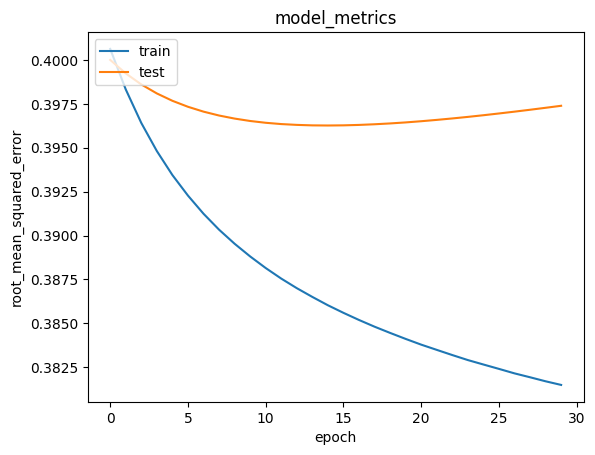

In [113]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Pada grafik diatas dapat dilihat bahwa nilai RMSE dominan turun setiap epoch yang dijalankan. Namun jika diperhatikan makapada epoch akhir-akhir, nilai test RMSE nya mulai naik kembali.

Selanjutnya kita cek apakah model tersebut telah memberikan rekomendasi yang blog yang sesuai.

In [137]:
blog_df = blog_new
df = rating

user_id = df.userId.sample(1).iloc[0]
blog_read_by_user = df[df.userId == user_id]

blog_not_read = blog_df[~blog_df['id'].isin(blog_read_by_user.blog_id.values)]['id']
blog_not_read = list(
    set(blog_not_read)
    .intersection(set(blog_to_blog_encoded.keys()))
)

blog_not_read = [[blog_to_blog_encoded.get(x)] for x in blog_not_read]
user_encoder = user_to_user_encoded.get(user_id)
user_blog_array = np.hstack(
    ([[user_encoder]] * len(blog_not_read), blog_not_read)
)

Kemudian kita menggunakan model.predict untuk memperoleh rekomendasi yang diberikan

In [138]:
ratings = model.predict(user_blog_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_blog_ids = [
    blog_encoded_to_blog.get(blog_not_read[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('Resto with high ratings from user')
print('----' * 8)

top_blog_user = (
    blog_read_by_user.sort_values(
        by = 'ratings',
        ascending=False
    )
    .head(5)
    .blog_id.values
)

blog_df_rows = blog_df[blog_df['id'].isin(top_blog_user)]
for row in blog_df_rows.itertuples():
    print(row.blog_title, ':', row.topic)

print('----' * 8)
print('Top 10 Blog recommendation')
print('----' * 8)

recommended_blog = blog_df[blog_df['id'].isin(recommended_blog_ids)]
for row in recommended_blog.itertuples():
    print(row.blog_title, ':', row.topic)

299/299 [==============================] - 1s 2ms/step
Showing recommendations for users: 3968
Resto with high ratings from user
--------------------------------
Essential Excel Functions for Data Analysis and Manipulation : data-analysis
Building Your Own Langchain Agents and Tools with LLMs: A Step-by-Step Tutorial : data-analysis
ChatGPT in Excel Data Analysis : data-analysis
CHOOSING AN ANALYTICAL TOOL: SAS, R, OR PYTHON : data-analysis
Introduction to Machine Learning for Data Analysts and for Non-Tech Professionals  : data-analysis
--------------------------------
Top 10 Blog recommendation
--------------------------------
Infrastructure as Code using Terraform : dev-ops
The rise and rise of ‘data-driven’ businesses : cybersecurity
InfoSecSherpa’s News Roundup for Monday, March 20, 2023 : information-security
Top 5 Data Management Trends Taking the Finance Industry by Storm in 2023. : security
Machine Learning 101: A Beginner’s Guide : ai
Starting Your Data Analytics Journey: A C

Dapat dilihat bahwa rekomendasi yang diberikan oleh siste. User tersebut memberi rating tertinggi kepada blog yang memiliki topic 'data-analysis'. Sehingga pada bagian rekomendasi beberapa blog yang direkomendasikan bertopik data analysis dan ai. Tidak hanya itu jika dilihat secara spesifik, judul dari blog yang direkomendasikan juga masih memiliki hubungan dengan data.